<a href="https://colab.research.google.com/github/Abhi5241/Hate-Speech-Classification-using-LSTM/blob/main/HateSpeechClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk

In [7]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [8]:
!unzip /content/imbalance.zip


Archive:  /content/imbalance.zip
  inflating: test.csv                
  inflating: train.csv               


In [9]:
imbalance_data = pd.read_csv('/content/train.csv')
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
imbalance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
imbalance_data["label"].unique()

array([0, 1])

# **Exploratory Data Analysis**

<Axes: xlabel='label', ylabel='count'>

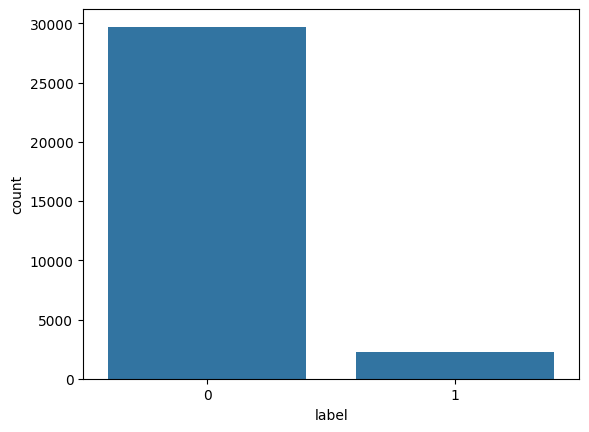

In [12]:
sns.countplot(x="label", data=imbalance_data)

In [13]:
imbalance_data.shape

(31962, 3)

In [14]:
imbalance_data.isnull().sum()

,0
id,0
label,0
tweet,0


In [15]:
imbalance_data.drop("id",axis=1,inplace=True)

In [16]:
imbalance_data.iloc[0,1]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [17]:
!unzip /content/labeled_data.csv.zip


Archive:  /content/labeled_data.csv.zip
  inflating: labeled_data.csv        


In [18]:
raw_data = pd.read_csv('/content/labeled_data.csv')
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [19]:
raw_data.shape

(24783, 7)

In [20]:
raw_data.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [21]:
raw_data.drop(['Unnamed: 0','count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)

In [22]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [23]:
raw_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

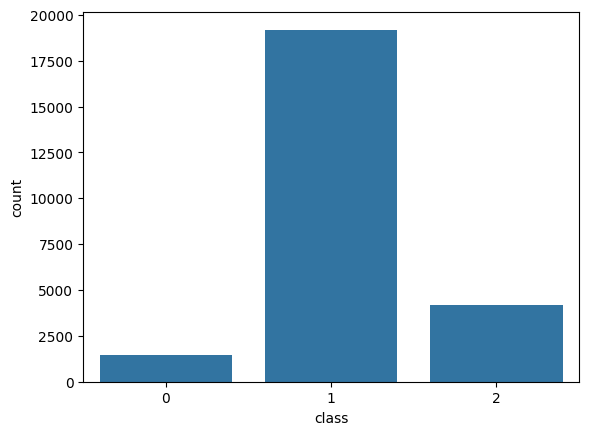

In [24]:
sns.countplot(x="class", data=raw_data)

0 ---> Hate \
1 ---> Abusive \
2 ---> No Hate

In [25]:
raw_data[raw_data['class']==0]['class']

,class
85,0
89,0
110,0
184,0
202,0
...,...
24576,0
24685,0
24751,0
24776,0


In [26]:
raw_data['class'].replace({0:1},inplace=True)

<ipython-input-26-54ac29fd7441>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({0:1},inplace=True)


In [27]:
raw_data['class'].unique()


array([2, 1])

<Axes: xlabel='class', ylabel='count'>

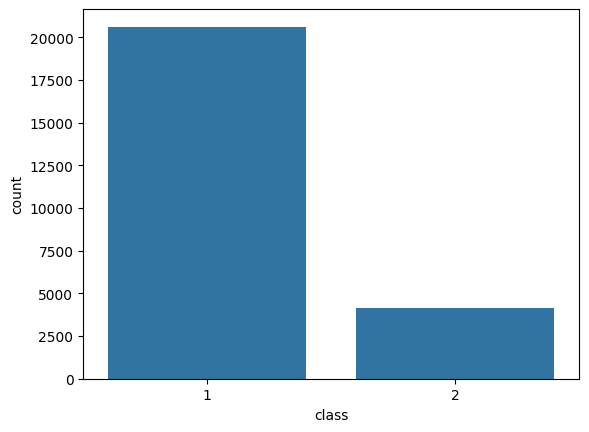

In [28]:
sns.countplot(x='class',data=raw_data)

In [29]:
raw_data['class'].replace({2:0},inplace=True)

<ipython-input-29-5037d1b085d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({2:0},inplace=True)


<Axes: xlabel='class', ylabel='count'>

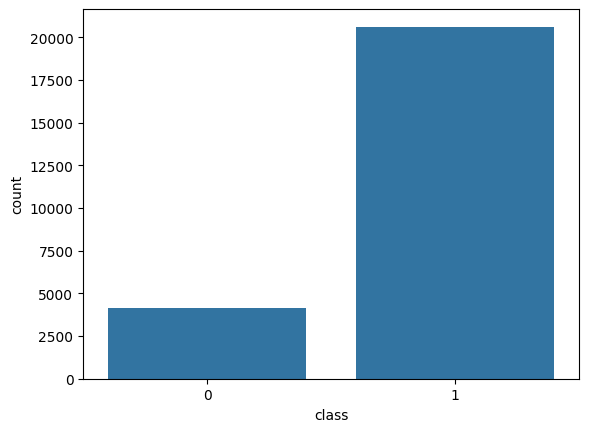

In [30]:
sns.countplot(x='class',data=raw_data)

In [31]:
raw_data.rename(columns={'class':'label'},inplace=True)

In [32]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [33]:
raw_data.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [34]:
frame=[imbalance_data,raw_data]

In [35]:
df=pd.concat(frame)

In [36]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [37]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

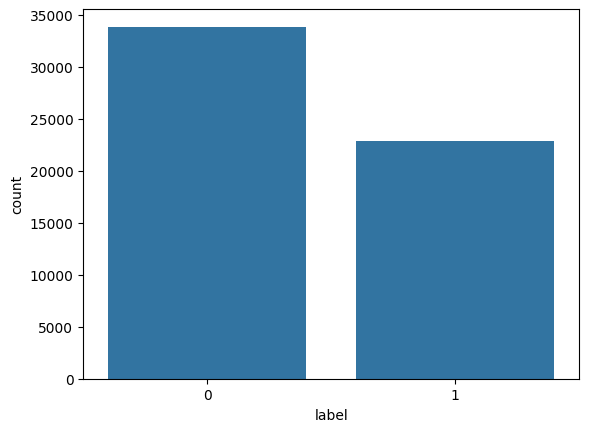

In [38]:
sns.countplot(x='label',data=df)

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [41]:
def data_cleaning(words):
  words=str(words).lower()
  words=re.sub('\[.*?\]','',words)
  words=re.sub('https?://\S+|www\.\S+','',words)
  words=re.sub('<.*?>+','',words)
  words=re.sub('[%s]' % re.escape(string.punctuation),'',words)
  words=re.sub('\n','',words)
  words=re.sub('\w*\d\w*','',words)
  words=[word for word in words.split(' ') if word not in stopword]
  words=" ".join(words)
  words=[stemmer.stem(word) for word in words.split(' ')]
  words=" ".join(words)
  return words

In [42]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [43]:
df['tweet']=df['tweet'].apply(data_cleaning)

In [44]:
df['tweet'][0]

,tweet
0,user father dysfunct selfish drag kid dysfunc...
0,rt mayasolov woman shouldnt complain clean ho...


In [45]:
df.iloc[1]['tweet']

'user user thank lyft credit cant use caus dont offer wheelchair van pdx    disapoint getthank'

In [46]:
x=df['tweet']
y=df['label']


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

45396 45396
11349 11349


In [48]:
x_train.head()

,tweet
943,bitch give back rub
7755,realli cant believ year miss dad amp think of...
13537,oh multipl dna ol girl man ran train hoe
11353,im fuck bitch shit
19319,hate conserv homophob use tragedi way spout an...


In [49]:
x_train.shape

(45396,)

In [50]:
all_words=[word for sentence in df.tweet for word in sentence.split()]
unique_words=set(all_words)
vocab_size=len(unique_words)
print("Vocabulary Size:",vocab_size)

Vocabulary Size: 57086


In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
max_words=30000
max_len=300

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)


In [53]:
sequences=tokenizer.texts_to_sequences(x_train)
sequences_matrix=pad_sequences(sequences,maxlen=max_len)

In [54]:
sequences_matrix

array([[    0,     0,     0, ...,   103,    51,  2603],
       [    0,     0,     0, ..., 10103, 15758,   128],
       [    0,     0,     0, ...,  1884,   523,     4],
       ...,
       [    0,     0,     0, ...,   120,   820,  3749],
       [    0,     0,     0, ...,   488,   975,   775],
       [    0,     0,     0, ...,  3685,    37,  1014]], dtype=int32)

In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from keras.optimizers import Adam

In [56]:
model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss="binary_crossentropy",optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [58]:
history=model.fit(sequences_matrix,y_train,batch_size=128,epochs=2,validation_split=0.2)

Epoch 1/2
284/284 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.8336 - loss: 0.3765 - val_accuracy: 0.9458 - val_loss: 0.1557
Epoch 2/2
284/284 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.9594 - loss: 0.1126 - val_accuracy: 0.9463 - val_loss: 0.1523


In [59]:
x_test

,tweet
22328,wait arriv sister nephew oh ive miss
27078,user much
13547,oh friday night night bitch
5537,user user hello mahið hope good less day ...
11073,went smart car bitch smart lip
...,...
29026,motiv ur mondaymorn book wks yoga class user
18025,rt watdafckyoumean brother weekend bitch longl...
25566,user go far accomplish good thing despit congr...
6532,wendydavistexa ha ha ha good fat dyke


In [60]:
test_sequences=tokenizer.texts_to_sequences(x_test)
test_sequences_matrix=pad_sequences(test_sequences,maxlen=max_len)

In [61]:
accr=model.evaluate(test_sequences_matrix,y_test)

355/355 ━━━━━━━━━━━━━━━━━━━━ 49s 139ms/step - accuracy: 0.9449 - loss: 0.1611


In [62]:
lstm_prediction=model.predict(test_sequences_matrix)

355/355 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step


In [63]:
lstm_prediction

array([[0.00140918],
       [0.0526769 ],
       [0.9914511 ],
       ...,
       [0.01484044],
       [0.9490741 ],
       [0.9810953 ]], dtype=float32)

In [64]:
res=[]
for prediction in lstm_prediction:
  if prediction[0]<0.5:
    res.append(0)
  else:
    res.append(1)

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,res))

[[6590  204]
 [ 416 4139]]


In [66]:
import pickle
with open('tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [67]:
model.save('model.h5')

In [68]:
import keras


In [69]:
load_model=keras.models.load_model("model.h5")

In [79]:
with open('tokenizer.pickle','rb') as handle:
  load_tokenizer=pickle.load(handle)

Prediction

In [110]:
test="i dont like you, you are ugly"
def clean_text(words):
  words=str(words).lower()
  words=re.sub('\[.*?\]','',words)
  words=re.sub('https?://\S+|www\.\S+','',words)
  words=re.sub('<.*?>+','',words)
  words=re.sub('[%s]' % re.escape(string.punctuation),'',words)
  words=re.sub('\n','',words)
  words=re.sub('\w*\d\w*','',words)
  words=[word for word in words.split(' ') if word not in stopword]
  words=" ".join(words)
  words=[stemmer.stem(word) for word in words.split(' ')]
  words=" ".join(words)
  return words

In [111]:
test=[clean_text(test)]
print(test)

['dont like ugli']


In [112]:
seq=load_tokenizer.texts_to_sequences(test)
padded=pad_sequences(seq,maxlen=300)

In [113]:
pred=load_model.predict(padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [114]:
print("pred",pred)
if pred<0.5:
  print("No Hate")
else:
  print("Hate")

pred [[0.5720895]]
Hate
